# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [4]:
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [5]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

## **2. Load the data set**


In [6]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2023-03-30 11:13:42--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2023-03-30 11:13:43--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubc

In [7]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [8]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [9]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Examine X dimension
X.shape

(4695, 881)

In [11]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [16]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [25]:
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
chosen_regressors = ['SVR', 'BaggingRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'BayesianRidge', 'HistGradientBoostingRegressor', 'RandomForestRegressor']

REGRESSORS = [   
    est    
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
    ]
reg = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)
train,test = reg.fit(X_train, X_test, Y_train, Y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 17%|█▋        | 1/6 [00:00<00:02,  1.84it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.2058447835300774, 'Adjusted R-Squared': 0.07001548932735657, 'RMSE': 1.3840664062695702, 'Time taken': 0.5437681674957275}


 50%|█████     | 3/6 [00:01<00:00,  3.41it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.4919328389047464, 'Adjusted R-Squared': 0.4050349599159202, 'RMSE': 1.107043774021864, 'Time taken': 0.38846468925476074}
{'Model': 'BayesianRidge', 'R-Squared': 0.30966584961430643, 'Adjusted R-Squared': 0.19159371652711543, 'RMSE': 1.2904283934076102, 'Time taken': 0.10084748268127441}


 67%|██████▋   | 4/6 [00:02<00:01,  1.67it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.5350437951855198, 'Adjusted R-Squared': 0.45551945054184473, 'RMSE': 1.0590348579530053, 'Time taken': 1.0651700496673584}


 83%|████████▎ | 5/6 [00:05<00:01,  1.56s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.520615569530291, 'Adjusted R-Squared': 0.43862347592935447, 'RMSE': 1.0753409726958554, 'Time taken': 3.268648386001587}


100%|██████████| 6/6 [00:07<00:00,  1.20s/it]

{'Model': 'SVR', 'R-Squared': 0.4784690929619698, 'Adjusted R-Squared': 0.38926842596545286, 'RMSE': 1.12161615663391, 'Time taken': 1.819150686264038}


In [ ]:

reg = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None)
train,test = reg.fit(X_train, X_test, Y_train, Y_test)


In [26]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.07
RandomForestRegressor,0.44,0.52,1.08,3.27
BaggingRegressor,0.41,0.49,1.11,0.39
SVR,0.39,0.48,1.12,1.82
BayesianRidge,0.19,0.31,1.29,0.10
AdaBoostRegressor,0.07,0.21,1.38,0.54


In [27]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.07
RandomForestRegressor,0.44,0.52,1.08,3.27
BaggingRegressor,0.41,0.49,1.11,0.39
SVR,0.39,0.48,1.12,1.82
BayesianRidge,0.19,0.31,1.29,0.10
AdaBoostRegressor,0.07,0.21,1.38,0.54


## **5. Data visualization of model performance**

[(0.0, 1.0)]

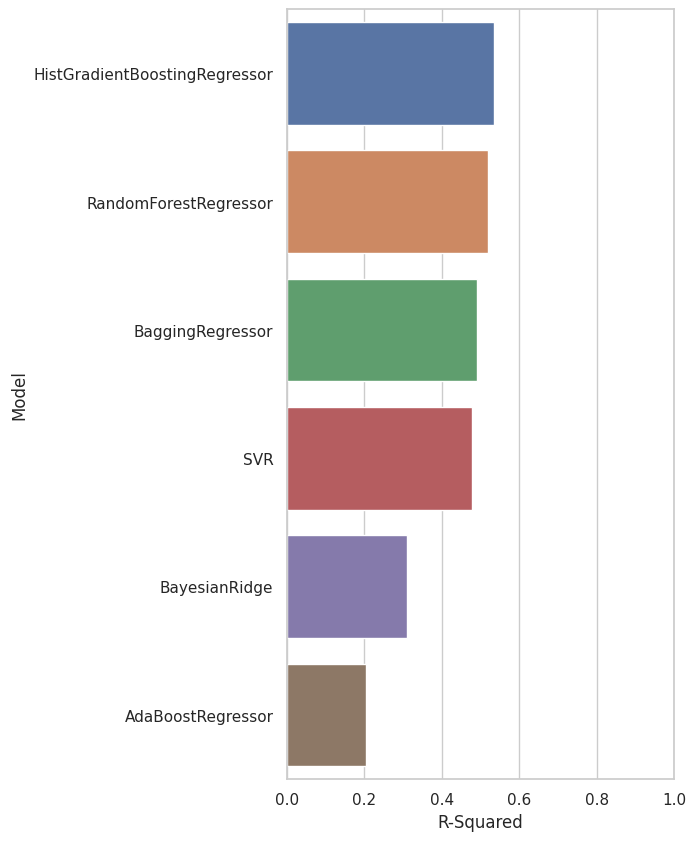

In [29]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

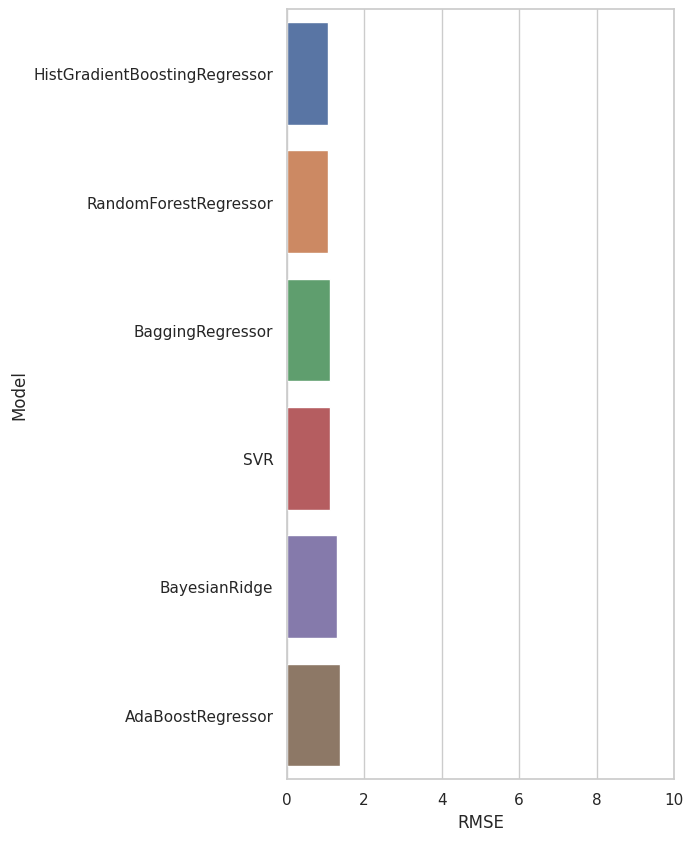

In [30]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

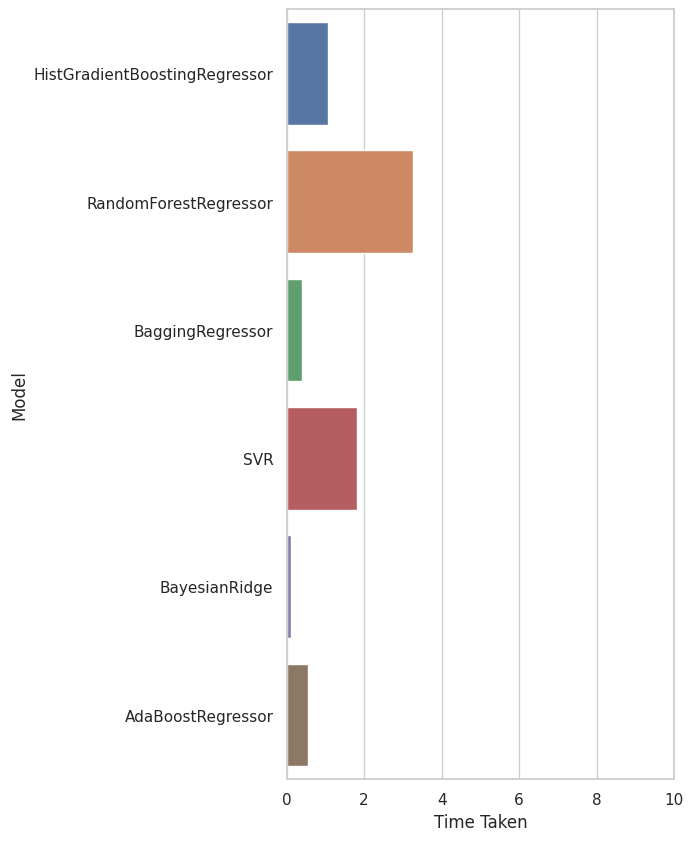

In [31]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))